# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
import  sklearn.feature_selection as fs
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics
from prettytable import PrettyTable
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
import sklearn.svm as svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']
print(mnist)
print()


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.00000000e+00 4.14823084e-03 2.26838203e-02 1.16030430e-02
 1.02411557e-02 2.29235334e-02 1.29196255e-02 1.37543806e-03
 1.21899138e-04 1.10495292e-02 2.57983947e-02 7.93631567e-03
 1.27032480e-02 3.62254496e-02 5.26512876e-03 2.11480556e-03
 0.00000000e+00 8.92963339e-03 1.62834261e-02 2.77126844e-02
 3.25087500e-02 4.44508754e-02 8.47488135e-03 6.25083127e-04
 2.24904401e-04 8.25008204e-03 4.47519876e-02 2.22980823e-02
 3.55529068e-02 2.01881954e-02 2.14479211e-02 1.16495255e-04
 0.00000000e+00 2.81637021e-02 2.51961374e-02 1.83835536e-02
 5.00059796e-02 2.14696901e-02 1.82916951e-02 0.00000000e+00
 0.00000000e+00 7.51555601e-03 3.63525440e-02 4.54886759e-02
 1.71962127e-02 1.46752380e-02 2.47851320e-02 1.09238117e-04
 1.92166943e-04 3.74530299e-03 2.39184421e-02 1.70753195e-02
 1.62070254e-02 2.60742506e-02 2.70240002e-02 3.22704245e-03
 6.77217436e-05 2.23300554e-03 1.45037578e-02 1.05342548e-02
 2.66241506e-02 2.19220821e-02 1.57422210e-02 4.35037515e-03]


In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)
feature_imp = feature_imp[:20]
print(feature_imp)

pixel_4_4    0.050006
pixel_5_3    0.045489
pixel_3_2    0.044752
pixel_2_5    0.044451
pixel_5_2    0.036353
pixel_1_5    0.036225
pixel_3_4    0.035553
pixel_2_4    0.032509
pixel_4_1    0.028164
pixel_2_3    0.027713
pixel_6_6    0.027024
pixel_7_4    0.026624
pixel_6_5    0.026074
pixel_1_2    0.025798
pixel_4_2    0.025196
pixel_5_6    0.024785
pixel_6_2    0.023918
pixel_0_5    0.022924
pixel_0_2    0.022684
pixel_3_3    0.022298
dtype: float64


In [ ]:
print(feature_imp.index)

Index(['pixel_4_4', 'pixel_5_3', 'pixel_3_2', 'pixel_2_5', 'pixel_5_2',
       'pixel_1_5', 'pixel_3_4', 'pixel_2_4', 'pixel_4_1', 'pixel_2_3',
       'pixel_6_6', 'pixel_7_4', 'pixel_6_5', 'pixel_1_2', 'pixel_4_2',
       'pixel_5_6', 'pixel_6_2', 'pixel_0_5', 'pixel_0_2', 'pixel_3_3'],
      dtype='object')


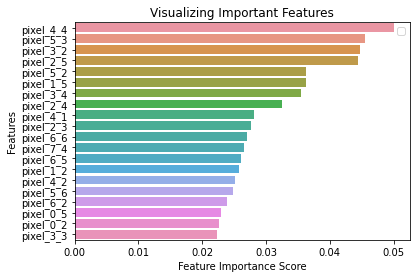

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
print(mnist['feature_names'].index('pixel_3_4'))
arr2 = np.stack(feature_imp.index).tolist()
arrTT = []
for x in arr2:
  arrTT.append(mnist['feature_names'].index(x))

print(arrTT)
Xnew = X[:,arrTT]
print(Xnew)

28
[36, 43, 26, 21, 42, 13, 28, 20, 33, 19, 54, 60, 53, 10, 34, 46, 50, 5, 2, 27]
[[ 0.  0. 12. ...  1.  5.  0.]
 [16. 16. 15. ...  5.  0. 16.]
 [15. 16.  1. ... 12.  0.  6.]
 ...
 [16. 14.  8. ...  1.  1. 16.]
 [14.  0. 16. ...  0.  2. 10.]
 [15.  6.  5. ...  1. 10. 16.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = RandomForestClassifier()
model.fit(
  X_train, y_train
)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
accuracyRandomNotSelectionFeature = metrics.accuracy_score(y_test, y_pred)
precisionRandomNotSelectionFeature =metrics.precision_score(y_test, y_pred,average='weighted')
recallRandomNotSelectionFeature = metrics.recall_score(y_test, y_pred,average='weighted')
f1RandomNotSelectionFeature = metrics.f1_score(y_test, y_pred,average='weighted')



              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        52
           3       1.00      0.95      0.97        56
           4       0.97      1.00      0.98        64
           5       0.96      0.97      0.97        73
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        62
           8       0.94      0.96      0.95        52
           9       0.98      0.96      0.97        68

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.33, random_state=42)
model = RandomForestClassifier()
model.fit(
  X_train, y_train
)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
accuracyRandomSelcetionFeature = metrics.accuracy_score(y_test, y_pred)
precisionRandomSelcetionFeature =metrics.precision_score(y_test, y_pred,average='weighted')
recallRandomSelcetionFeature = metrics.recall_score(y_test, y_pred,average='weighted')
f1RandomSelcetionFeature = metrics.f1_score(y_test, y_pred,average='weighted')


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.90      0.95      0.92        55
           2       0.96      0.98      0.97        52
           3       0.96      0.91      0.94        56
           4       0.90      0.95      0.92        64
           5       1.00      0.97      0.99        73
           6       1.00      0.98      0.99        57
           7       0.92      0.98      0.95        62
           8       0.94      0.92      0.93        52
           9       0.97      0.91      0.94        68

    accuracy                           0.95       594
   macro avg       0.96      0.95      0.95       594
weighted avg       0.96      0.95      0.95       594



In [ ]:
t = PrettyTable(["Metrics","Random Not Selection Feature", "Random Selection Feature"])
t.add_row(["Accuracy", round(accuracyRandomNotSelectionFeature, 4), round(accuracyRandomSelcetionFeature, 4)])
t.add_row(["Precision",round(precisionRandomNotSelectionFeature, 4) ,round(precisionRandomSelcetionFeature, 4) ])
t.add_row(["Recall",round(recallRandomNotSelectionFeature, 4) ,round(recallRandomSelcetionFeature, 4) ])
t.add_row(["F1",round(f1RandomNotSelectionFeature, 4) ,round(f1RandomSelcetionFeature, 4)  ])
print(t)

+-----------+------------------------------+--------------------------+
|  Metrics  | Random Not Selection Feature | Random Selection Feature |
+-----------+------------------------------+--------------------------+
|  Accuracy |            0.9781            |          0.9545          |
| Precision |            0.9784            |          0.9558          |
|   Recall  |            0.9781            |          0.9545          |
|     F1    |            0.9781            |          0.9547          |
+-----------+------------------------------+--------------------------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data


In [ ]:
data = pd.read_csv("bank.csv")
X = data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]
print(X)
scale = StandardScaler()
scaled_X = scale.fit_transform(X)
scaled_X

       age  balance  day  campaign  pdays  previous
0       59     2343    5         1     -1         0
1       56       45    5         1     -1         0
2       41     1270    5         1     -1         0
3       55     2476    5         1     -1         0
4       54      184    5         2     -1         0
...    ...      ...  ...       ...    ...       ...
11157   33        1   20         1     -1         0
11158   39      733   16         4     -1         0
11159   32       29   19         2     -1         0
11160   43        0    8         2    172         5
11161   34        0    9         1     -1         0

[11162 rows x 6 columns]


array([[ 1.49150488,  0.25252514, -1.26574556, -0.55416834, -0.48118405,
        -0.36325984],
       [ 1.23967567, -0.4599736 , -1.26574556, -0.55416834, -0.48118405,
        -0.36325984],
       [-0.0194704 , -0.0801603 , -1.26574556, -0.55416834, -0.48118405,
        -0.36325984],
       ...,
       [-0.77495804, -0.46493443,  0.39689074, -0.18678537, -0.48118405,
        -0.36325984],
       [ 0.14841574, -0.47392593, -0.90946635, -0.18678537,  1.10957066,
         1.81833188],
       [-0.6070719 , -0.47392593, -0.79070662, -0.55416834, -0.48118405,
        -0.36325984]])

#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

enc = OneHotEncoder(categories='auto',sparse=False)
Xenc = enc.fit_transform(data[columns])
numerical_columns = [c for c in data.columns if c not in columns]
print(numerical_columns)
X = np.concatenate([data[numerical_columns], Xenc], axis=1)
data['deposit']=data['deposit'].replace(['yes','no'], [1,0])
y = data['deposit'].values
X[0:,7][X[0:,7] == "yes"] = 1
X[0:,7][X[0:,7] == "no"] = 0
X

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[59, 2343, 5, ..., 0.0, 0.0, 1.0],
       [56, 45, 5, ..., 0.0, 0.0, 1.0],
       [41, 1270, 5, ..., 0.0, 0.0, 1.0],
       ...,
       [32, 29, 19, ..., 0.0, 0.0, 1.0],
       [43, 0, 8, ..., 0.0, 0.0, 0.0],
       [34, 0, 9, ..., 0.0, 0.0, 1.0]], dtype=object)

#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_model(type, X_train = X_train, y_train= y_train, X_test = X_test, y_test=y_test):
  model = ''
  name = ''
  if(type == 0):
    name = "Random Forest"
    model=RandomForestClassifier(n_estimators=100)
  if(type == 1):
    name = "NB"
    model = GaussianNB()
  if(type == 2):
    name = "kNN"
    model = KNeighborsClassifier(n_neighbors=3)
  if(type == 3):
    name = "Decision Tree"
    model = DecisionTreeClassifier()
  if(type == 4):
    name = "SVM"
    model = svm.SVC(kernel='linear')
  if(type == 5):
    name = "Logicstic"
    model = LogisticRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision =metrics.precision_score(y_test, y_pred,average='weighted')
  recall = metrics.recall_score(y_test, y_pred,average='weighted')
  f1 = metrics.f1_score(y_test, y_pred,average='weighted')
  return [name,round(accuracy,4),round(precision,4),round(recall,4),round(f1,4)]


In [ ]:
t = PrettyTable(["Name","Accuracy", "Precision","Recall", "F1"])
t.add_row(train_model(0))
t.add_row(train_model(1))
t.add_row(train_model(2))
t.add_row(train_model(3))

print(t)

+---------------+----------+-----------+--------+--------+
|      Name     | Accuracy | Precision | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |   1.0    |    1.0    |  1.0   |  1.0   |
|       NB      |  0.9994  |   0.9994  | 0.9994 | 0.9994 |
|      kNN      |  0.7366  |   0.7365  | 0.7366 | 0.7364 |
| Decision Tree |   1.0    |    1.0    |  1.0   |  1.0   |
+---------------+----------+-----------+--------+--------+


#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [ ]:
X_new=feature_selection.SelectKBest(feature_selection.f_classif , k=10).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

t = PrettyTable(["Name","Accuracy", "Precision","Recall", "F1"])
t.add_row(train_model(0,X_train, y_train, X_test, y_test))
t.add_row(train_model(1,X_train, y_train, X_test, y_test))
t.add_row(train_model(2,X_train, y_train, X_test, y_test))
t.add_row(train_model(3,X_train, y_train, X_test, y_test))

print(t)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


+---------------+----------+-----------+--------+--------+
|      Name     | Accuracy | Precision | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |   1.0    |    1.0    |  1.0   |  1.0   |
|       NB      |   1.0    |    1.0    |  1.0   |  1.0   |
|      kNN      |  0.8555  |   0.8563  | 0.8555 | 0.8555 |
| Decision Tree |   1.0    |    1.0    |  1.0   |  1.0   |
+---------------+----------+-----------+--------+--------+


#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [ ]:
data=pd.read_csv('creditcard.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_new=feature_selection.SelectKBest(feature_selection.f_classif , k=10).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
t = PrettyTable(["Name","Accuracy", "Precision","Recall", "F1"])
t.add_row(train_model(0,X_train, y_train, X_test, y_test))
t.add_row(train_model(1,X_train, y_train, X_test, y_test))
t.add_row(train_model(2,X_train, y_train, X_test, y_test))
t.add_row(train_model(3,X_train, y_train, X_test, y_test))
t.add_row(train_model(4,X_train, y_train, X_test, y_test))
t.add_row(train_model(5,X_train, y_train, X_test, y_test))


print(t)

+---------------+----------+-----------+--------+--------+
|      Name     | Accuracy | Precision | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |  0.9997  |   0.9997  | 0.9997 | 0.9996 |
|       NB      |  0.9908  |   0.9984  | 0.9908 | 0.9942 |
|      kNN      |  0.9996  |   0.9995  | 0.9996 | 0.9995 |
| Decision Tree |  0.9992  |   0.9992  | 0.9992 | 0.9992 |
|      SVM      |  0.9994  |   0.9994  | 0.9994 | 0.9994 |
|   Logicstic   |  0.9992  |   0.9992  | 0.9992 | 0.9992 |
+---------------+----------+-----------+--------+--------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.